# Лабораторная работа 1
## Часть 1 - квадратик

Задать квадрат с помощью матрицы координат, повернуть его и сдвинуть относительно исходного положения (как на картинке). Вывести исходный квадрат и результат.


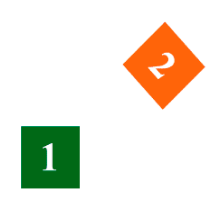

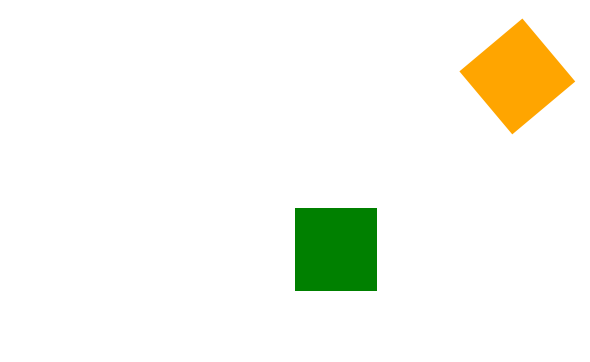

In [1]:
a = 15 # длина стороны
alpha = math.radians(50) # угол поворота

matrix_rotate = matrix([
    [cos(alpha), -sin(alpha)],
    [sin(alpha), cos(alpha)]
]) # матрица поворота

move_x = 30 # смещение по х
move_y = 40 # смещение по y

# Для перемещения фигуры необходимо прибавить к каждой ее точке величины смещения. Будем делать это через сложение матриц
matrix_move = matrix([[move_x, move_y] for _ in range(5)])

square_original = matrix([[0, 0], [0, a], [a, a], [a, 0], [0, 0]])
square_rotated = square_original * matrix_rotate
square_moved = square_rotated + matrix_move

show(polygon(square_original, color='green') + polygon(square_moved, color='orange'), 
     xmin=-50, xmax=50, ymin=-10, ymax=50, aspect_ratio = 1, axes=False)

## Часть 2 - исследование функции
Для заданной формулой функции найти:
1. Область определения функции.
2. Является ли функция четной или нечетной, является ли периодической.
3. Точки пересечения графика с осями координат.
4. Промежутки знакопостоянства.
5. Промежутки возрастания и убывания.
6. Точки экстремума и значения в этих точках.
7. Непрерывность. Наличие точек разрыва и их классификация.
8. Асимптоты.

Построить график функции, асимптоты, промежутки знакопостоянства.

Вариант 6.
Функция: $\Large{\frac{ln(x - 1)}{(x - 1)^2}}$

In [2]:
f = ln(x - 1) / (x - 1)^2

In [3]:
show(f)

log(x - 1)/(x - 1)^2

### График функции

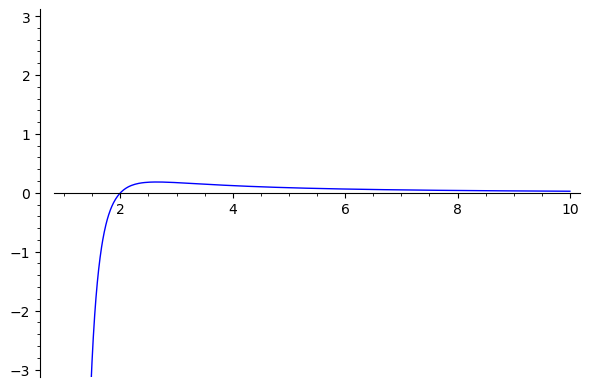

In [4]:
plot_func = plot(f, (x, 1, 10), ymin=-3, ymax=3)
plot_func

### Область определения

$\begin{aligned}
\begin{cases}
   (x - 1)^2 \neq 0, 
   \\
   x - 1 > 0.
\end{cases}
\end{aligned} \Rightarrow x > 1$

### Чётность, периодичность

Функция не является ни чётной, ни нечётной из-за несимметричной области определения.

Докажем отсутствие периодичности.

In [5]:
var("T")
eq = f(x) - f(x + T)
solve(eq, T)

[T == -(x*log(x - 1) + sqrt(log(T + x - 1)*log(x - 1))*(x - 1) - log(x - 1))/log(x - 1), T == -(x*log(x - 1) - sqrt(log(T + x - 1)*log(x - 1))*(x - 1) - log(x - 1))/log(x - 1)]

Явных решений нет, следовательно функция не является периодической.

### Точки пересечения графика с осями координат

In [6]:
solve(f, x) # Решаем уравнение f(x) = 0

[x == 2]

In [7]:
f(2)

0

Получили, что график пересекает ось абсцисс в точке $(2; 0)$. Пересечения с осью ординат отсутствуют из-за области определения функции.

### Промежутки знакопостоянства

Рассмотрим значения функции слева и справа от точки $(2; 0)$.

In [8]:
f(2 - 0.1)

-0.130074710688675

In [9]:
f(2 + 0.1)

0.0787687436399380

Слева от точки функция принимает отрицательные значения, справа - положительные.

Следовательно, функция положительна при $x \in (2; +\infty)$, отрицательна при $x \in (1; 2)$.

### Промежутки возрастания и убывания. Точки экстремума

Найдём точки, производная в которых равна нулю.

In [10]:
df = f.derivative()
show(df)

-2*log(x - 1)/(x - 1)^3 + 1/(x - 1)^3

In [11]:
solve(df, x)

[x == e^(1/2) + 1]

Нашли одну точку экстремума: $x = e^{\frac{1}{2}} + 1$. Определеим знак производной слева и справа от нее.

In [12]:
extremum = exp(1/2) + 1

In [13]:
f(extremum)

1/2*e^(-1)

In [14]:
n(df(extremum - 0.1)) # n(...) - выдаёт численное значение

0.0336883011872103

In [15]:
n(df(extremum + 0.1))

-0.0220227504514824

Производная слева положительная, а справа - отрицательная. Значит $\large{(e^{\frac{1}{2}} + 1; \frac{1}{2 * e})}$ - точка максимума.

Функция возрастает при $x \in (1; e^{\frac{1}{2}} + 1)$, убывает при $x \in (e^{\frac{1}{2}} + 1; + \infty)$.

### Непрерывность

Функция непрерывна на всей области определения.

### Асимптоты

Найдём горизонтальную асимптоту:

In [16]:
limit(f, x=infinity)

0

Значит, $y = 0$ - горизонтальная асимптота.

Найдём вертикальную асимптоту:

In [17]:
limit(f, x=1)

Infinity

В точке $x = 1$ функция стремится к бесконечности, значит $x = 1$ - вертикальная асимптота.

Найдём наклонную асимптоту.

In [18]:
limit(f(x) / x, x=infinity)

0

Полученный предел равен 0, значит наклонных асимптот нет.

Построим график и его асимптоты.

In [19]:
plot_asympt1 = plot(0, (x, -1, 10), ymin=-3, ymax=3, color='red')

In [20]:
plot_asympt2 = line([(1,x) for x in srange(-4,4,0.1)], color='red')

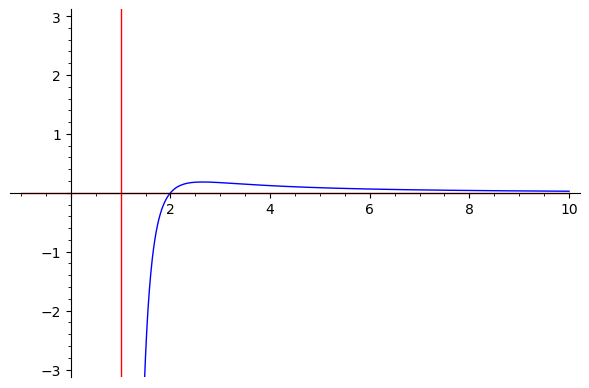

In [21]:
show(plot_func + plot_asympt1 + plot_asympt2)